UAS  Teknologi Open Source

by 2279009 Vardina Nava Madya Kasman

Eksplorasi dari dataset Pengamatan Kasus Covid-19

- import dataset (code disediakan ketika pertama buat notebook)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-case-surveillance-public-use-dataset/COVID-19_Case_Surveillance_Public_Use_Data.csv


- Cek isi data dan kolom

In [2]:
dataset = pd.read_csv('/kaggle/input/covid19-case-surveillance-public-use-dataset/COVID-19_Case_Surveillance_Public_Use_Data.csv')

print(dataset.head(10))


/tmp/ipykernel_20/1612054287.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('/kaggle/input/covid19-case-surveillance-public-use-dataset/COVID-19_Case_Surveillance_Public_Use_Data.csv')


  cdc_report_dt pos_spec_dt    onset_dt             current_status   sex  \
0    2020/11/10  2020/11/10         NaN  Laboratory-confirmed case  Male   
1    2020/11/14  2020/11/10  2020/11/10  Laboratory-confirmed case  Male   
2    2020/11/19  2020/11/10  2020/11/09  Laboratory-confirmed case  Male   
3    2020/11/14  2020/11/10         NaN  Laboratory-confirmed case  Male   
4    2020/11/13  2020/11/10  2020/11/10  Laboratory-confirmed case  Male   
5    2020/11/17  2020/11/10  2020/11/08  Laboratory-confirmed case  Male   
6    2020/11/14  2020/11/10         NaN  Laboratory-confirmed case  Male   
7    2020/11/10  2020/11/10         NaN  Laboratory-confirmed case  Male   
8    2020/11/10  2020/11/10         NaN  Laboratory-confirmed case  Male   
9    2020/11/17  2020/11/10         NaN  Laboratory-confirmed case  Male   

       age_group Race and ethnicity (combined)  hosp_yn   icu_yn death_yn  \
0  10 - 19 Years           Black, Non-Hispanic       No  Unknown       No   
1  10 - 1

- Bentuk data

In [3]:
dataset.shape

(8405079, 11)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405079 entries, 0 to 8405078
Data columns (total 11 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   cdc_report_dt                  object
 1   pos_spec_dt                    object
 2   onset_dt                       object
 3   current_status                 object
 4   sex                            object
 5   age_group                      object
 6   Race and ethnicity (combined)  object
 7   hosp_yn                        object
 8   icu_yn                         object
 9   death_yn                       object
 10  medcond_yn                     object
dtypes: object(11)
memory usage: 705.4+ MB


Karena banyak error saya convert dulu index-nya jadi tipe datetime

In [5]:
dataset.index = pd.to_datetime(dataset.index)
dataset.head(10)

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
1970-01-01 00:00:00.000000000,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1970-01-01 00:00:00.000000001,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
1970-01-01 00:00:00.000000002,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
1970-01-01 00:00:00.000000003,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
1970-01-01 00:00:00.000000004,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes
1970-01-01 00:00:00.000000005,2020/11/17,2020/11/10,2020/11/08,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing
1970-01-01 00:00:00.000000006,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,Missing,Missing
1970-01-01 00:00:00.000000007,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing
1970-01-01 00:00:00.000000008,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Unknown,Unknown,No,Unknown
1970-01-01 00:00:00.000000009,2020/11/17,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8405079 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.008405078
Data columns (total 11 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   cdc_report_dt                  object
 1   pos_spec_dt                    object
 2   onset_dt                       object
 3   current_status                 object
 4   sex                            object
 5   age_group                      object
 6   Race and ethnicity (combined)  object
 7   hosp_yn                        object
 8   icu_yn                         object
 9   death_yn                       object
 10  medcond_yn                     object
dtypes: object(11)
memory usage: 769.5+ MB


In [7]:
dataset.describe()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
count,8405079,2870789,4395957,8405079,8405061,8404990,8405072,8405079,8405079,8405079,8405079
unique,321,313,338,2,5,10,9,4,4,4,4
top,2020/06/24,2020/11/09,2020/11/02,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,No,Missing,No,Missing
freq,155857,50595,49527,7910118,4340898,1635264,2781176,3502556,6178281,3690813,6063390


Dari sini diketahui bahwa total ada 11 kolom dan 8,405,079 baris.
datatype semuanya object karena belum di-specify.
Dari tabel hasil describe juga dapat diketahui mengenai atribut per kolom, yaitu jumlahnya, data uniknya, data yang paling sering muncul, dan seberapa sering data tersebut muncul.

Sehingga menurut mayoritas data, maka covid terdeteksi paling banyak pada pertengahan 2020, teruji lab, wanita, usia 20+, dan detil data tidak jelas.

- Selanjutnya saya coba untuk melihat visualisasi statistiknya

In [8]:
import matplotlib.pyplot as plt

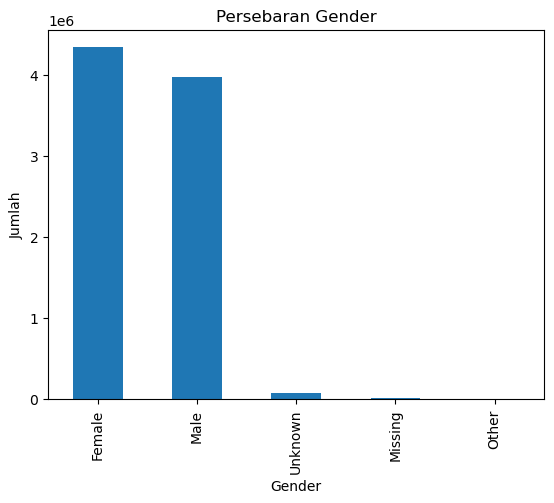

In [9]:
dataset['sex'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.title('Persebaran Gender')
plt.show()

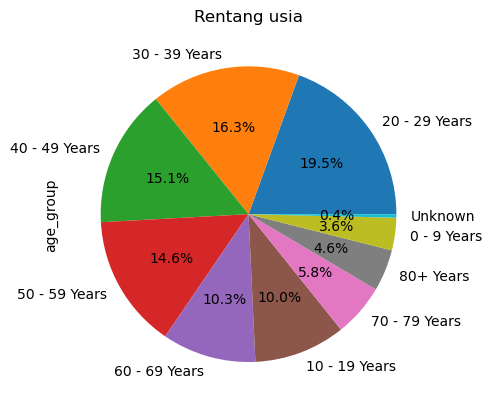

In [10]:
dataset['age_group'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Rentang usia')
plt.show()

Dari kedua diagram tersebut, dapat dilihat persebaran datanya. Data terbanyak menunjukkan hasil wanita berusia 20-29 tahun.

- Selanjutnya, saya coba buat analisis Time Series-nya

In [11]:
#data clean karena kolom status kurang 1 data
dataset['current_status'].fillna(method='ffill', inplace=True)

#datanya terlalu banyak jadi ambil acak 1000 row
sampled_data = dataset.sample(n=1000)

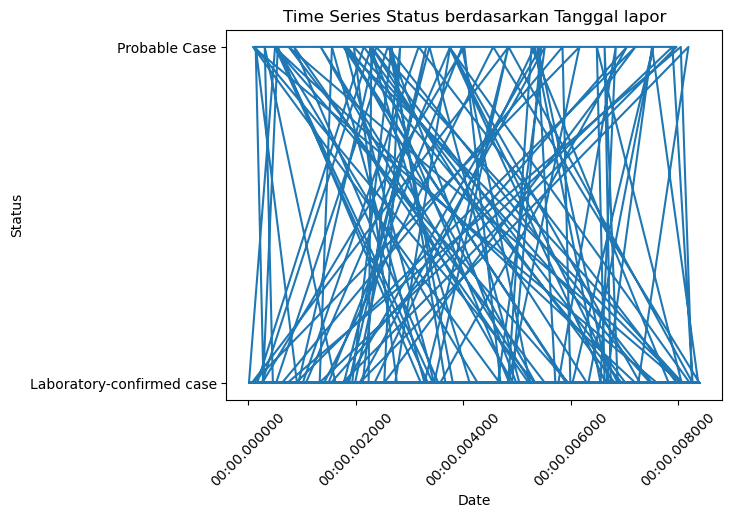

In [12]:
plt.plot(sampled_data.index, sampled_data['current_status'])
plt.xlabel('Date')
plt.ylabel('Status')
plt.title('Time Series Status berdasarkan Tanggal lapor')
plt.xticks(rotation=45)
plt.show()

Karena hasil tampilannya sulit dimengerti, saya akan coba normalisasi datanya dan buat grafik

In [13]:
#ambil data laboratory-confirmed case
lab = sampled_data[sampled_data['current_status'] == 'Laboratory-confirmed case']['current_status']
lab.head()

1970-01-01 00:00:00.002254081    Laboratory-confirmed case
1970-01-01 00:00:00.004392313    Laboratory-confirmed case
1970-01-01 00:00:00.000501246    Laboratory-confirmed case
1970-01-01 00:00:00.004944142    Laboratory-confirmed case
1970-01-01 00:00:00.007745545    Laboratory-confirmed case
Name: current_status, dtype: object

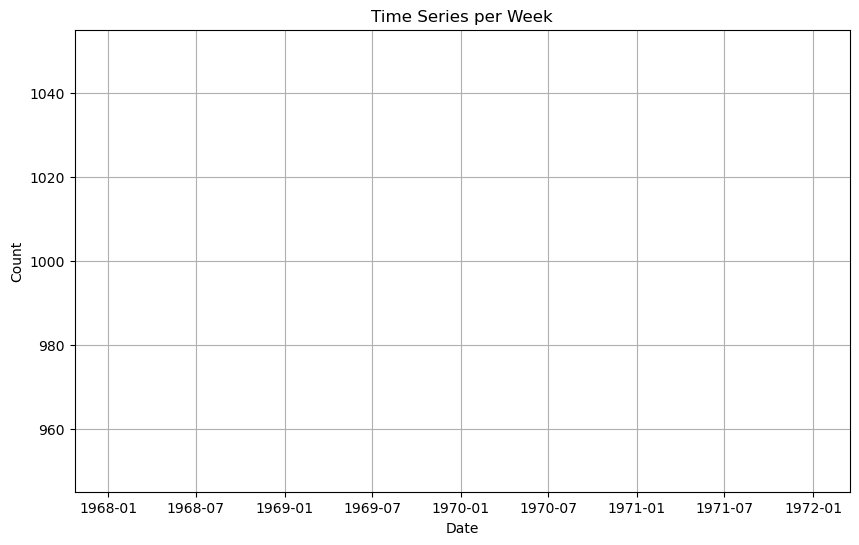

In [14]:
data_counts = sampled_data.resample('W').size()

plt.figure(figsize=(10, 6))
plt.plot(data_counts.index, data_counts.values)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Time Series per Week')
plt.grid(True)
plt.show()

Berikut adalah hasil visualisasi Time Series dari data Laboratory-confirmed case berdasarkan rentang waktu per minggu. Ada sekitar 4 titik yang mewakili minggu pada 1 bulan.

Grafik garis menunjukkan peningkatan pada jumlah kasus Covid seiring waktu. meski ada naik-turun, tapi grafik cenderung meningkat.

- Selanjutnya saya akan coba memvisualisasi data dengan scatter plot.

Kali ini saya coba pakai kolom death_yn karena saya penasaran.

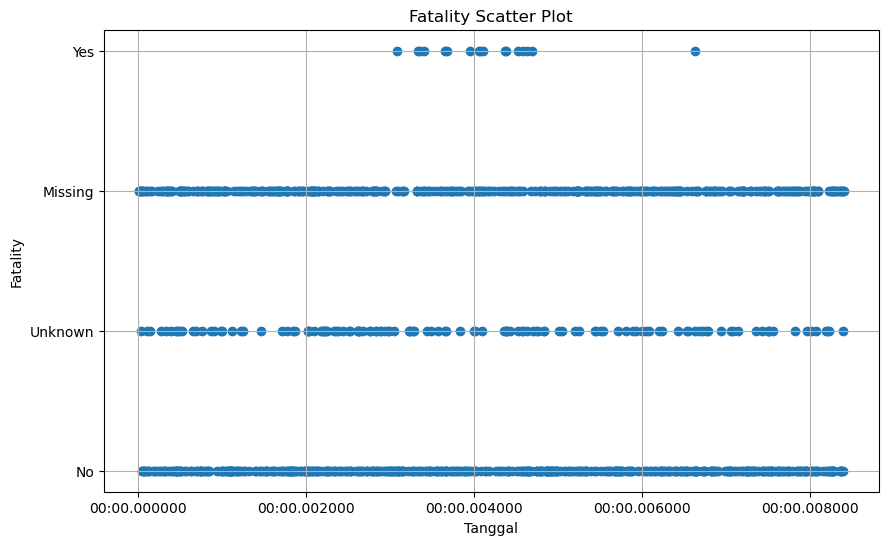

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(sampled_data.index, sampled_data['death_yn'])
plt.xlabel('Tanggal')
plt.ylabel('Fatality')
plt.title('Fatality Scatter Plot')
plt.grid(True)
plt.show()

Dari scatter plot, diperoleh hasil bahwa jumlah tewas lebih sedikit dibanding kemungkinan data lainnya. Jumlah tewas dalam rentang waktu Maret 2020 - Desember 2020 paling banyak ada di bulan Juni.

Sementara untuk data No dan Missing, dapat dilihat bahwa butiran lebih berdekatan di sebelah kanan dibanding butiran-butiran yang di sebelah kiri. Artinya data yang di kanan ada lebih banyak, sehingga bisa disimpulkan bahwa terdapat peningkatan jumlah data seiring waktu.

Sekian eksplorasi data yang telah saya coba pelajari dan buat sebaik mungkin.
Terima kasih atas kesempatannya.